## This model tries to Predict the Closing Value of Nifty50 based on previous days parameters

Importing libraries

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Importing the data from NSE website into a dataframe

In [2]:
nifty=pd.read_csv('NIFTY 50_Historical_PR_01012024to25082024.csv')

In [3]:
nifty.head()

,Index Name,Date,Open,High,Low,Close
0,NIFTY 50,23 Aug 2024,24845.40,24858.40,24771.65,24823.15
1,NIFTY 50,22 Aug 2024,24863.40,24867.35,24784.45,24811.50
2,NIFTY 50,21 Aug 2024,24680.55,24787.95,24654.50,24770.20
3,NIFTY 50,20 Aug 2024,24648.90,24734.30,24607.20,24698.85
4,NIFTY 50,19 Aug 2024,24636.35,24638.80,24522.95,24572.65


In [4]:
nifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index Name  161 non-null    object 
 1   Date        161 non-null    object 
 2   Open        161 non-null    float64
 3   High        161 non-null    float64
 4   Low         161 non-null    float64
 5   Close       161 non-null    float64
dtypes: float64(4), object(2)
memory usage: 7.7+ KB


In [5]:
nifty.describe()

,Open,High,Low,Close
count,161.000000,161.000000,161.000000,161.000000
mean,22842.716770,22941.286957,22712.499068,22833.005280
std,1062.406555,1054.714306,1071.879696,1067.910975
min,21185.250000,21459.000000,21137.200000,21238.800000
25%,22020.300000,22126.800000,21905.650000,22011.950000
50%,22458.800000,22526.600000,22358.300000,22462.000000
75%,23723.100000,23889.900000,23670.450000,23868.800000
max,25030.950000,25078.300000,24956.400000,25010.900000


In [6]:
##Checking for missing values

In [9]:
nifty.isnull().sum()

Index Name    0
Date          0
Open          0
High          0
Low           0
Close         0
dtype: int64

In [16]:
nifty[nifty.isna().any(axis=True)]

,Index Name,Date,Open,High,Low,Close


In [17]:
##Checking for outliers


<AxesSubplot: >

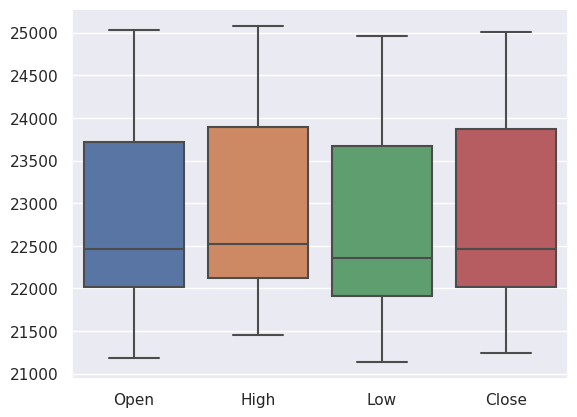

In [18]:
sns.set_theme()
sns.boxplot(nifty)

In [19]:
## The data has no outliers

In [20]:
##Removing unwanted features

In [22]:
nifty=nifty.drop(['Index Name','Date'],axis=1)

In [23]:
nifty

,Open,High,Low,Close
0,24845.40,24858.40,24771.65,24823.15
1,24863.40,24867.35,24784.45,24811.50
2,24680.55,24787.95,24654.50,24770.20
3,24648.90,24734.30,24607.20,24698.85
4,24636.35,24638.80,24522.95,24572.65
...,...,...,...,...
156,21705.75,21749.60,21629.20,21710.80
157,21605.80,21685.65,21564.55,21658.60
158,21661.10,21677.00,21500.35,21517.35
159,21751.35,21755.60,21555.65,21665.80


In [24]:
##Checking for Correlation between features


<AxesSubplot: >

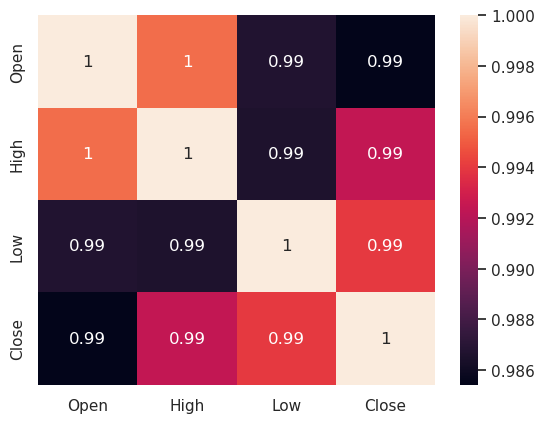

In [26]:
sns.heatmap(nifty.corr(),annot=True)

In [27]:
## Seperating into Features and target

Since we want to predict next day's clsoing price, we will add the next day's closing price as another feature

In [28]:
nifty['Next_day']=nifty['Close'].shift(-1)

checking correlation again

In [30]:
nifty.corr()

,Open,High,Low,Close,Next_day
Open,1.000000,0.995534,0.986706,0.985423,0.993990
High,0.995534,1.000000,0.986576,0.992422,0.991416
Low,0.986706,0.986576,1.000000,0.993975,0.981490
Close,0.985423,0.992422,0.993975,1.000000,0.980086
Next_day,0.993990,0.991416,0.981490,0.980086,1.000000


Since all features are highly correalated, will not remove any feature

In [31]:
##Splitting into X and Y

In [35]:
x=nifty.drop(['Next_day'],axis=True)

In [36]:
x

,Open,High,Low,Close
0,24845.40,24858.40,24771.65,24823.15
1,24863.40,24867.35,24784.45,24811.50
2,24680.55,24787.95,24654.50,24770.20
3,24648.90,24734.30,24607.20,24698.85
4,24636.35,24638.80,24522.95,24572.65
...,...,...,...,...
156,21705.75,21749.60,21629.20,21710.80
157,21605.80,21685.65,21564.55,21658.60
158,21661.10,21677.00,21500.35,21517.35
159,21751.35,21755.60,21555.65,21665.80


In [100]:
y=nifty['Next_day']

In [99]:
y.head()

,Next_day
0,24811.50
1,24770.20
2,24698.85
3,24572.65
4,24541.15


In [45]:
from sklearn.model_selection import train_test_split

In [101]:
##Splitting into test and train
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
##Scalting the features

In [102]:
scaler=StandardScaler()

In [103]:
scaler.fit(x_train)

StandardScaler()

In [104]:
x_train_scaled=scaler.transform(x_train)

In [105]:
x_test_scaled=scaler.transform(x_test)

In [106]:
## Importing the Linera Regression Model
from sklearn.linear_model import LinearRegression

In [107]:
regressor=LinearRegression()

In [108]:
y_train.isnull().sum()

1

In [110]:
y_train=y_train.fillna(y_train.mean())

In [111]:
y_test=y_test.fillna(y_test.mean())

In [65]:
## Mean Imputaion for missing values

In [112]:
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [113]:
y_pred=regressor.predict(x_test_scaled)

In [69]:
##Checking r2 Score

In [114]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [115]:
score

0.9681836923957451

In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

29061.428466736095
97.69079999031733
170.4741284381184


In [117]:
residuals=y_test-y_pred

/tmp/ipykernel_98/3562827250.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True,ax=axes[0,1])


<AxesSubplot: xlabel='Next_day'>

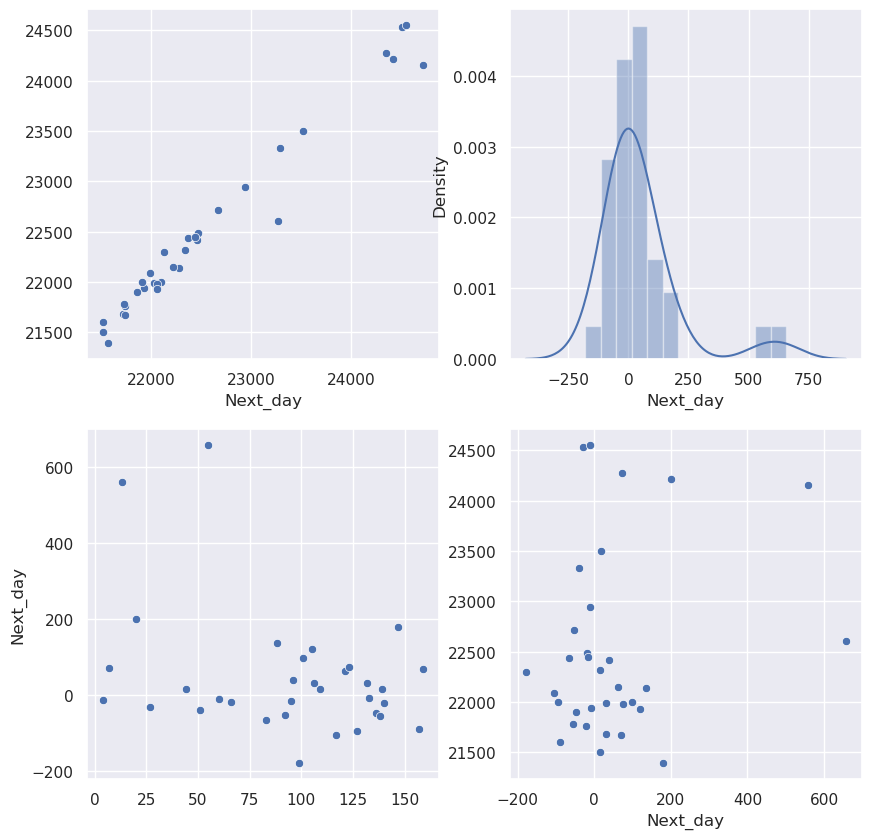

In [126]:
## Visualizing the Regression
fig,axes=plt.subplots(2,2,figsize=(10,10))
sns.scatterplot(x=y_test,y=y_pred,ax=axes[0,0])
sns.distplot(residuals,kde=True,ax=axes[0,1])
sns.scatterplot(residuals,ax=axes[1,0])
sns.scatterplot(x=residuals,y=y_pred,ax=axes[1,1])

In [129]:
import pickle as pkl

In [132]:
pkl.dump(regressor,file=open('regressor_nifty.pkl','wb'))

In [133]:
pkl.dump(scaler,file=open('scaler_nifty.pkl','wb'))